# **Computer Price Prediction**

In [ ]:
# step 1: import library
import pandas as pd

In [ ]:
# step 2: read data
computer = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/ComputerPrice.csv')

In [ ]:
computer.head()

,Price,SpeedGHz,HDisk,RAM,Screen,Branded,Gaming,MultiCore
0,14990,25,80,4,14,no,no,yes
1,17950,33,85,2,14,no,no,yes
2,15950,25,170,4,15,no,no,yes
3,18490,25,170,8,14,no,no,no
4,32950,33,340,16,14,no,no,yes


In [ ]:
computer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      6259 non-null   int64 
 1   SpeedGHz   6259 non-null   int64 
 2   HDisk      6259 non-null   int64 
 3   RAM        6259 non-null   int64 
 4   Screen     6259 non-null   int64 
 5   Branded    6259 non-null   object
 6   Gaming     6259 non-null   object
 7   MultiCore  6259 non-null   object
dtypes: int64(5), object(3)
memory usage: 391.3+ KB


In [ ]:
computer.describe()

,Price,SpeedGHz,HDisk,RAM,Screen
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,22195.766097,52.011024,416.601694,8.286947,14.608723
std,5808.039557,21.157735,258.548445,5.631099,0.905115
min,9490.000000,25.000000,80.000000,2.000000,14.000000
25%,17940.000000,33.000000,214.000000,4.000000,14.000000
50%,21440.000000,50.000000,340.000000,8.000000,14.000000
75%,25950.000000,66.000000,528.000000,8.000000,15.000000
max,53990.000000,100.000000,2100.000000,32.000000,17.000000


In [ ]:
# Correlation
computer.corr()

<ipython-input-7-c7617342d195>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  computer.corr()


,Price,SpeedGHz,HDisk,RAM,Screen
Price,1.000000,0.300976,0.430258,0.622748,0.296041
SpeedGHz,0.300976,1.000000,0.372304,0.234760,0.189074
HDisk,0.430258,0.372304,1.000000,0.777726,0.232802
RAM,0.622748,0.234760,0.777726,1.000000,0.208954
Screen,0.296041,0.189074,0.232802,0.208954,1.000000


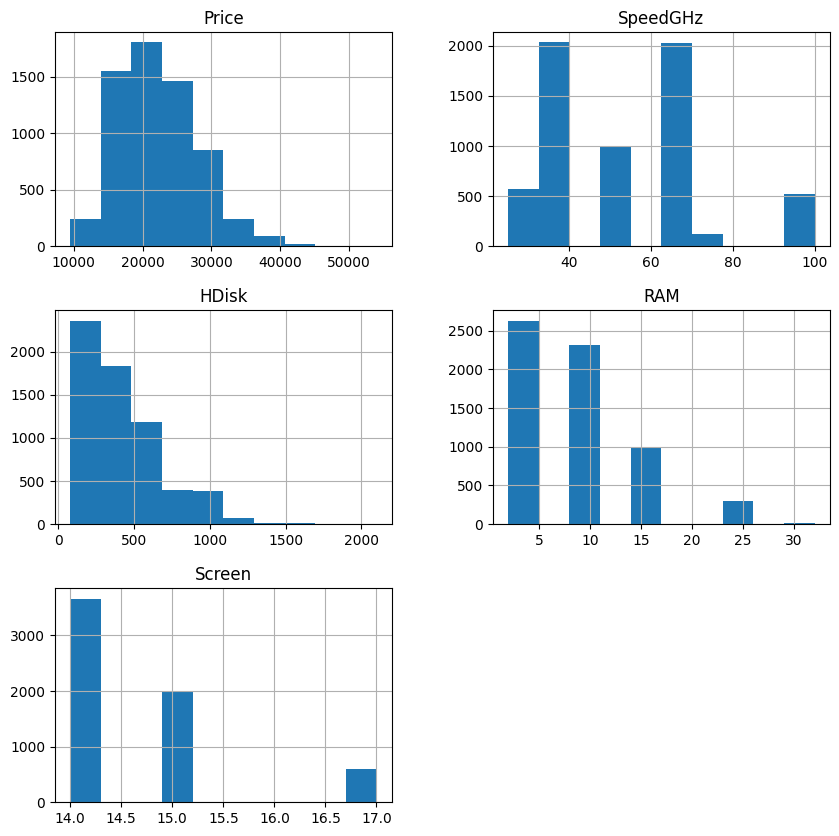

In [ ]:
computer.hist(figsize=(10,10));

In [ ]:
# ordinal encoding
computer['Branded'].replace({'yes':1,'no':0},inplace=True)

In [ ]:
computer['Gaming'].replace({'yes':1,'no':0},inplace=True)

In [ ]:
computer['MultiCore'].replace({'yes':1,'no':0},inplace=True)

In [ ]:
computer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      6259 non-null   int64
 1   SpeedGHz   6259 non-null   int64
 2   HDisk      6259 non-null   int64
 3   RAM        6259 non-null   int64
 4   Screen     6259 non-null   int64
 5   Branded    6259 non-null   int64
 6   Gaming     6259 non-null   int64
 7   MultiCore  6259 non-null   int64
dtypes: int64(8)
memory usage: 391.3 KB


In [ ]:
# define output and input
computer.columns

Index(['Price', 'SpeedGHz', 'HDisk', 'RAM', 'Screen', 'Branded', 'Gaming',
       'MultiCore'],
      dtype='object')

In [ ]:
y = computer['Price']
X = computer[['SpeedGHz', 'HDisk', 'RAM', 'Screen', 'Branded', 'Gaming',
       'MultiCore']]

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2529)

In [ ]:
# select model
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False)

In [ ]:
# train
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg.intercept_

4209.896678846828

In [ ]:
X.columns

Index(['SpeedGHz', 'HDisk', 'RAM', 'Screen', 'Branded', 'Gaming', 'MultiCore'], dtype='object')

In [ ]:
reg.coef_

array([   57.06281251,    -5.01587902,   806.80916669,   970.64400728,
        -647.68401851,   119.12054146, -3882.24351326])

In [ ]:
# pred
y_pred = reg.predict(X_test)

In [ ]:
# error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3098.2001186386788

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
mean_absolute_error(y_test,y_pred)

1852.139137287351